In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
results_path = "/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/tmp_dir/exp4/exp4_nonsplitfiles.csv"
cols = ["hardware", "chunk shape", "split time(s)", "merge time(s)"]
csv_data = pd.read_csv(results_path)

In [33]:
print("nb rows:", len(csv_data.index))
csv_data["split_time"] = csv_data["split_time"].astype('float16')
csv_data = csv_data.drop(columns=["merge_time"])
csv_data.head()

nb rows: 20


,hardware,chunks_shape,split_time
0,SSD,"(5, 1512, 1750)",428.00
1,SSD,"(275, 189, 250)",450.25
2,HDD,"(275, 189, 250)",474.25
3,HDD,"(5, 1512, 1750)",434.25
4,SSD,"(5, 1512, 1750)",429.00


In [34]:
hdd_data = csv_data[csv_data["hardware"]=="HDD"].drop(columns=["hardware"])
ssd_data = csv_data[csv_data["hardware"]=="SSD"].drop(columns=["hardware"])

In [36]:
hdd_data_mean = hdd_data.groupby(["chunks_shape"]).mean()
hdd_data_std = hdd_data.groupby(["chunks_shape"]).std()
ssd_data_mean = ssd_data.groupby(["chunks_shape"]).mean()
ssd_data_std = ssd_data.groupby(["chunks_shape"]).std()

In [6]:
# csv_data = csv_data.replace("(5, 1512, 1750)", "good").replace("(275, 189, 250)", "bad")
# csv_data_mean = csv_data_mean.sort_values(by="chunk shape")
# csv_data_mean

Text(0.5, 0.98, 'Results of experiment 1 comparing dask behavior when splitting/merging 3D arrays')

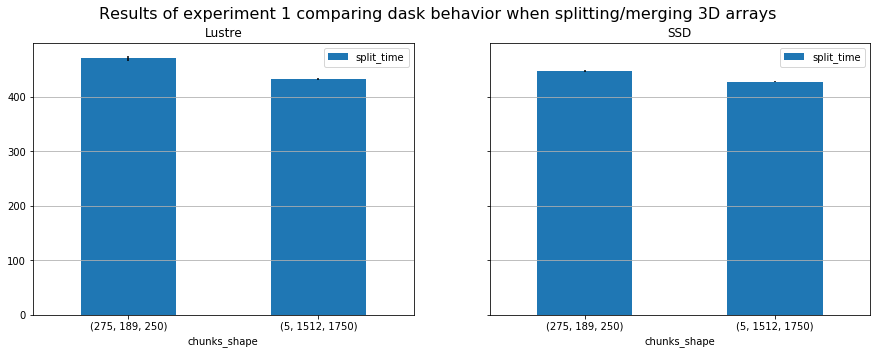

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
hdd_data_mean.plot(kind="bar", ax=axes[0], yerr=hdd_data_std, rot=0, title="Lustre")
ssd_data_mean.plot(kind="bar", ax=axes[1], yerr=ssd_data_std, rot=0, title="SSD")
axes[0].grid(axis="y")
axes[1].grid(axis="y")
fig.suptitle('Results of experiment 1 comparing dask behavior when splitting/merging 3D arrays', fontsize=16)

In [8]:
imgfilepath = "/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/tmp_dir/second.png"
fig.savefig(imgfilepath)